In [1]:
# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds
from wordcloud import WordCloud, STOPWORDS 

# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
#drive.mount('/content/drive')

In [2]:
 #import data
df = pd.read_csv('/content/drive/My Drive/edited_topics_set2.csv')
# shape
print('No. of rows and columns :', df.shape)
# show first few rows
df.head()

No. of rows and columns : (2155, 7)


,Unnamed: 0,Unnamed: 0.1,_id,topic,content,processed_content,processed_topic
0,0,0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",west bengal govern tuesday decid impos complet...,nation
1,1,1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",govern weigh pros con halt import includ china...,busi
2,2,2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",central board secondari educ cbse slash syllab...,nation
3,3,3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",world health organ tuesday acknowledg emerg ev...,intern
4,4,4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",presid donald trump tuesday formal start withd...,intern


In [3]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
_id                  0
topic                0
content              0
processed_content    0
processed_topic      0
dtype: int64

In [4]:
def category_ngram(category, n):
    
    temp_df = df[df['processed_topic'] == category]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['processed_content'])
    
    frequencies = sum(sparse_matrix).toarray()[0]
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [5]:
# to plot wordcloud
# =================

def plot_wordcloud(headlines, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(headlines)
    plt.axis('off')
    plt.imshow(wc)

In [6]:
# to plot model accuracy and loss
# ===============================

def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='dodgerblue', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orange', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='dodgerblue', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orange', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [7]:
# to plot confusion matrix
# ========================

def plot_cm(pred, ticklabels, figsize):
      
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))

    cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ticklabels, rotation=90)
    ax.set_yticklabels(ticklabels, rotation=0)

    plt.show()

There are 52 news categories


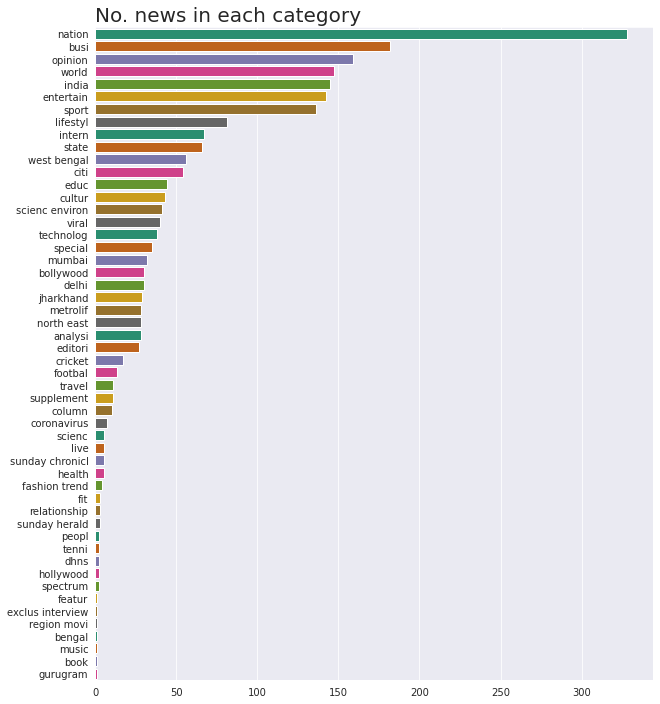

In [8]:
#No. of contents in each category
count_df = pd.DataFrame(df['processed_topic'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='processed_topic', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [16]:
# #Equalize no. of news category
# # container for dfs
# dfs = []

# # loop through each category and get 1004 rows and append to dfs
# for category in df['topic'].unique():
#     temp = df[df['topic']==category]
#     dfs.append(temp.sample(100))
    
# # concatenate dataframes
# df = pd.concat(dfs)

# # shuffle dataframe
# df = df.sample(frac=1).reset_index(drop=True)

# # first few rows
# df.head()

In [9]:
# unique news category
df['processed_topic'].unique()

array(['nation', 'busi', 'intern', 'special', 'scienc environ', 'live',
       'state', 'citi', 'entertain', 'metrolif', 'sport', 'opinion',
       'supplement', 'spectrum', 'sunday herald', 'peopl', 'dhns',
       'world', 'technolog', 'lifestyl', 'scienc', 'sunday chronicl',
       'analysi', 'editori', 'column', 'india', 'viral', 'mumbai',
       'delhi', 'educ', 'bollywood', 'cricket', 'fashion trend', 'fit',
       'cultur', 'music', 'footbal', 'travel', 'region movi', 'tenni',
       'health', 'hollywood', 'relationship', 'gurugram', 'book',
       'west bengal', 'jharkhand', 'north east', 'bengal', 'coronavirus',
       'exclus interview', 'featur'], dtype=object)

In [19]:
# most frequent bigrams of news belongs
category_ngram('fashion trend', 2)

,index,frequency
0,hugo boss,6
1,post share,4
2,mukesh mill,3
3,boss say,3
4,tommi hilfig,3
5,karan johar,3
6,black girl,3
7,ban kangana,3
8,fashion director,3
9,johar fair,2


In [20]:
# most frequent bigrams of news belongs 
category_ngram('state', 2)

,index,frequency
0,state govern,19
1,chief minist,17
2,test posit,15
3,latest updat,14
4,covid case,13
5,posit covid,13
6,covid pandem,12
7,dakshina kannada,12
8,updat live,11
9,social distanc,11


In [21]:
# most frequent bigrams of news belongs
category_ngram('educ', 2)

,index,frequency
0,karnataka result,27
1,offici websit,26
2,board result,23
3,final year,20
4,secondari educ,19
5,student appear,19
6,class result,18
7,onlin class,17
8,check result,16
9,lakh student,16


In [22]:
# most frequent bigrams of news belongs
category_ngram('travel', 2)

,index,frequency
0,stori facebook,11
1,facebook twitter,11
2,follow stori,11
3,wire agenc,10
4,modif text,10
5,publish wire,10
6,fee modif,10
7,stori publish,10
8,agenc fee,10
9,text headlin,9


In [23]:
# most frequent bigrams of news belongs
category_ngram('coronavirus', 2)

,index,frequency
0,pokhriy nishank,12
1,ramesh pokhriy,12
2,union minist,11
3,extraordinari situat,9
4,situat prevail,9
5,prevail countri,9
6,academ calendar,6
7,decid ration,6
8,import learn,6
9,drrpnishank juli,6


In [24]:
# most frequent bigrams of news belongs
category_ngram('book', 2)

,index,frequency
0,booker prize,3
1,publish ireland,2
2,prize fiction,2
3,previous prize,1
4,prize mantel,1
5,prize open,1
6,prize twice,1
7,prose masteri,1
8,rahim author,1
9,panel judg,1


In [25]:
# most frequent bigrams of news belongs
category_ngram('hollywood', 2)

,index,frequency
0,justic leagu,4
1,version movi,4
2,joss whedon,4
3,gross abus,3
4,abus unprofession,3
5,complet unaccept,3
6,unprofession complet,3
7,doubl face,2
8,doubt specif,2
9,enabl way,2


In [26]:
# most frequent bigrams of news belongs
category_ngram('bollywood', 2)

,index,frequency
0,follow htshowbiz,27
1,post share,24
2,sushant singh,12
3,singh rajput,12
4,wound contain,8
5,challeng accept,7
6,film industri,7
7,die suicid,6
8,sushant die,6
9,social media,6


In [27]:
# most frequent bigrams of news belongs
category_ngram('west bengal', 2)

,index,frequency
0,state govern,39
1,offici say,39
2,chief minist,29
3,covid patient,27
4,safe home,24
5,north pargana,24
6,north bengal,23
7,onlin class,19
8,sourc say,17
9,mamata banerje,17


In [28]:
# most frequent bigrams of news belongs
category_ngram('music', 2)

,index,frequency
0,social media,3
1,coupl day,2
2,nepot jealousi,2
3,jealousi judgement,2
4,say want,1
5,realis stay,1
6,receiv amid,1
7,respect care,1
8,say realis,1
9,say video,1


In [17]:
# most frequent bigrams of news belongs 
category_ngram('footbal', 2)

,index,frequency
0,real madrid,12
1,champion leagu,7
2,premier leagu,5
3,tell report,5
4,titl race,5
5,leagu titl,4
6,juergen klopp,4
7,news confer,4
8,atletico madrid,4
9,fifa presid,4


In [18]:
# most frequent bigrams of news belongs
category_ngram('cricket', 2)

,index,frequency
0,west indi,18
1,intern cricket,9
2,test match,8
3,test seri,8
4,virat koh,8
5,test posit,7
6,fast bowler,6
7,second test,6
8,england west,6
9,south africa,5


In [13]:
# most frequent bigrams of news belongs 
category_ngram('busi', 2)

,index,frequency
0,compani say,36
1,covid pandem,33
2,relianc industri,26
3,point cent,25
4,profit crore,25
5,coronavirus pandem,24
6,central bank,24
7,unit state,23
8,say statement,22
9,rise cent,21


In [15]:
# most frequent bigrams of news belongs 
category_ngram('busi', 3)

,index,frequency
0,respond request comment,12
1,quarter end june,11
2,reserv bank india,10
3,brent crude futur,10
4,west texa intermedi,9
5,texa intermedi crude,9
6,crore year period,9
7,foreign institut investor,8
8,organ petroleum export,7
9,chairman manag director,7


In [16]:
#EDA
# most frequent unigrams of news belongs 'SCIENCE' category
category_ngram('scienc', 2)

,index,frequency
0,herd immun,6
1,deccan chronicl,6
2,research say,5
3,telangana state,4
4,click deccan,4
5,test posit,4
6,technolog scienc,4
7,review follow,4
8,latest news,4
9,chronicl technolog,4


In [12]:
# most frequent bigrams of news belongs 'SPORTS' category
category_ngram('sport', 2)

,index,frequency
0,west indi,42
1,test posit,33
2,covid pandem,24
3,premier leagu,22
4,mohun bagan,22
5,virat koh,21
6,social media,20
7,explain anand,18
8,tokyo olymp,18
9,play test,17


In [11]:
# most frequent trigrams of news belongs 
category_ngram('nation', 3)

,index,frequency
0,test posit covid,26
1,latest updat live,20
2,updat live news,20
3,minist narendra modi,20
4,prime minist narendra,20
5,gangster vika dubey,20
6,live news coronavirus,20
7,news coronavirus click,20
8,chief minist ashok,16
9,minist ashok gehlot,16


In [30]:
#Get text and labels
# container for sentences
news = np.array([headline for headline in df['content']])

# container for labels
labels = np.array([label for label in df['processed_topic']])

In [31]:
#Label encode target
# Label encoding news category
enc = LabelEncoder()
labels = enc.fit_transform(labels)
# print(enc.classes_)

In [32]:
#Model Parameters
# parameters

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [34]:
# train-test split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(news, labels, 
                                                                                          test_size=0.33)
                                                                                          #stratify=labels

In [35]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [43]:
#With Word Embedding
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 52)                1300      
Total params: 17,708
Trainable params: 17,708
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
# fit model
num_epochs = 150
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/150
31/31 - 0s - loss: 0.4383 - accuracy: 0.9099 - val_loss: 3.3222 - val_accuracy: 0.4088
Epoch 2/150
31/31 - 0s - loss: 0.4313 - accuracy: 0.9141 - val_loss: 3.3340 - val_accuracy: 0.4151
Epoch 3/150
31/31 - 0s - loss: 0.4235 - accuracy: 0.9172 - val_loss: 3.3531 - val_accuracy: 0.4046
Epoch 4/150
31/31 - 0s - loss: 0.4159 - accuracy: 0.9224 - val_loss: 3.3642 - val_accuracy: 0.4067
Epoch 5/150
31/31 - 0s - loss: 0.4086 - accuracy: 0.9213 - val_loss: 3.3862 - val_accuracy: 0.4109
Epoch 6/150
31/31 - 0s - loss: 0.4025 - accuracy: 0.9244 - val_loss: 3.3985 - val_accuracy: 0.4151
Epoch 7/150
31/31 - 0s - loss: 0.3953 - accuracy: 0.9286 - val_loss: 3.4191 - val_accuracy: 0.4067
Epoch 8/150
31/31 - 0s - loss: 0.3886 - accuracy: 0.9286 - val_loss: 3.4398 - val_accuracy: 0.4025
Epoch 9/150
31/31 - 0s - loss: 0.3816 - accuracy: 0.9348 - val_loss: 3.4582 - val_accuracy: 0.4088
Epoch 10/150
31/31 - 0s - loss: 0.3740 - accuracy: 0.9317 - val_loss: 3.4796 - val_accuracy: 0.4067
Epoch 11/

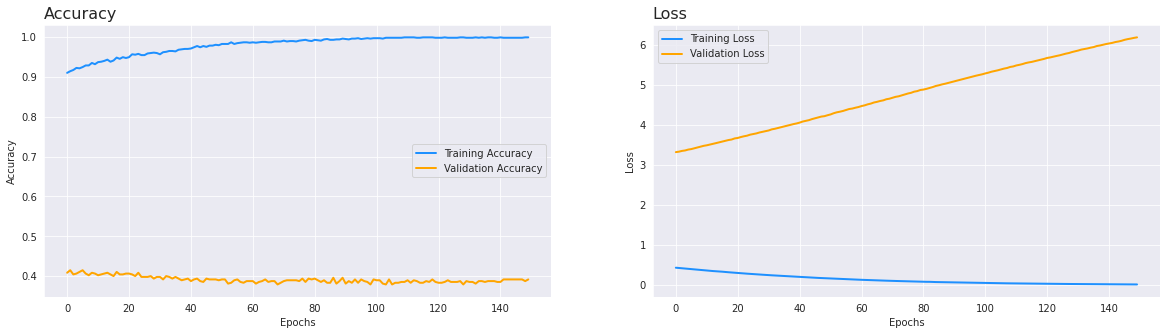

In [48]:
# plot history
plot_history(history)

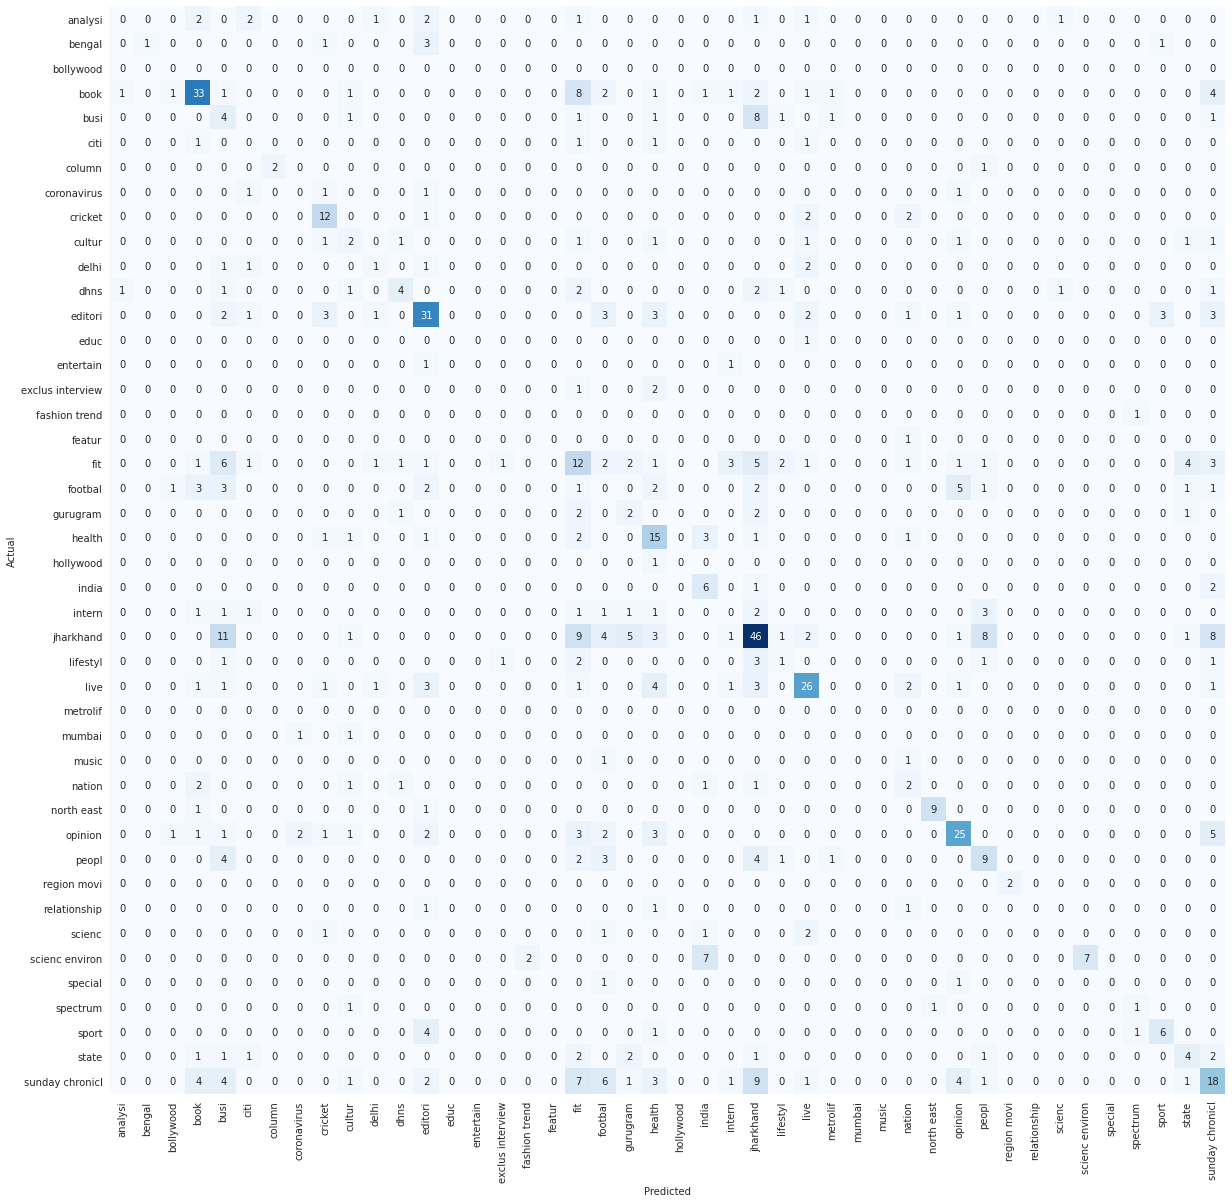

In [49]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 20)

In [52]:
# reviews on which we need to predict
sentence = [
    '''The Chhattisgarh Board of Secondary Education (CGBSE) will announce the high school (Class 10), higher secondary (Class 12) and higher secondary vocational exam results on Tuesday, June 23. The Chhattisgarh Board results will be declared at 11am by school education minister.","In a press release issued on Monday, the Chhattisgarh Board said that keeping in mind the Covid-19 situation, the CGBSE 10th, 12th results will be declared through video conferencing at state data centre in Raipur. ","Students who have appeared for the Chhattisgarh Board Class 10 and Class 12 exams can their results at cgbse.nic.in, http://results.gov.in/cgresults and results.cg.nic.in after it is announced.","Around 6 lakh students have registered for CGBSE class 10th board exams this year, while over 2.5 lakh students have registered for CGBSE class 12th board exams 2020.","Due to the coronavirus disease outbreak, CGBSE could not conduct examinations for all the subjects of Class 10 and 12. The exams for some minor subjects of Class 10 and Geography and a few optional papers of Class 12 had to be delayed.","The students have been awarded marks in these subjects on the basis of internal assessment. Those failing to pass the assessment and skip the procedures will be given the minimum passing marks. Nobody will fail during the assessment of the remaining subjects ''',
    '''Jose Mourinho launched an impassioned defence of Harry Kaneâ€™s form under his playing style at Tottenham Hotspur after television pundit Paul Merson suggested the England striker would struggle in the Portuguese managerâ€™s system.","Merson, a pundit with Sky Sports, said 26-year-old Kane would consider switching clubs if Mourinho continued adopting a conservative style in the Premier League, like they did in their 1-1 draw with Manchester United last week.","Kane has scored seven goals in 10 games under Mourinho but struggled to make an impact against United -- his first match since returning from a hamstring surgery in January -- and Mourinho said Merson was wrong to judge him based on one game.","â€œThe record of goals that Harry has with me (in charge) is easy for you to see ... I can say I had a few strikers who played for me and they are not bad,â€ Mourinho told reporters in a virtual news conference on Monday.","In a five-minute-long response, Mourinho then went on to mention the likes of Didier Drogba, Cristiano Ronaldo, Karim Benzema, Diego Milito and Zlatan Ibrahimovic, reeling off their goal scoring stats under his tenures at various clubs.","â€œSo dear Paul, I have lots of respect for you,â€ Mourinho added. â€œI think Harry Kane has no problems at all to score goals in my teams, especially when heâ€™s fit, when heâ€™s fresh and he has routines of playing.â€","There was good news on the injury front for Mourinho who confirmed forward Lucas Moura was available after recovering from an injury while Dele Alli is also in contention after serving his one-match suspension.","â€œFor the first time since I arrived, all six attacking players are available for the game,â€ Mourinho said.","â€œIâ€™ve had matches with only one and now finally I have six so I can have people playing and on the bench to rotate players. Our attacking options for this match are really good.'''
]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):
    print(enc.classes_[i])

analysi
bengal


In [53]:
#With LSTM
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 52)                1300      
Total params: 31,404
Trainable params: 31,404
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
# fit model
num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/50
31/31 - 2s - loss: 2.6840 - accuracy: 0.2516 - val_loss: 2.9949 - val_accuracy: 0.2327
Epoch 2/50
31/31 - 2s - loss: 2.5486 - accuracy: 0.2629 - val_loss: 3.0276 - val_accuracy: 0.2096
Epoch 3/50
31/31 - 2s - loss: 2.4368 - accuracy: 0.2961 - val_loss: 3.0189 - val_accuracy: 0.2411
Epoch 4/50
31/31 - 2s - loss: 2.2857 - accuracy: 0.3458 - val_loss: 3.1276 - val_accuracy: 0.2369
Epoch 5/50
31/31 - 2s - loss: 2.2068 - accuracy: 0.3478 - val_loss: 3.1069 - val_accuracy: 0.2306
Epoch 6/50
31/31 - 2s - loss: 2.0455 - accuracy: 0.3820 - val_loss: 3.1227 - val_accuracy: 0.1992
Epoch 7/50
31/31 - 2s - loss: 1.9406 - accuracy: 0.4348 - val_loss: 3.2748 - val_accuracy: 0.2285
Epoch 8/50
31/31 - 2s - loss: 1.8343 - accuracy: 0.4803 - val_loss: 3.2084 - val_accuracy: 0.2537
Epoch 9/50
31/31 - 2s - loss: 1.7127 - accuracy: 0.5135 - val_loss: 3.4251 - val_accuracy: 0.2516
Epoch 10/50
31/31 - 2s - loss: 1.5992 - accuracy: 0.5538 - val_loss: 3.3364 - val_accuracy: 0.2474
Epoch 11/50
31/31 -

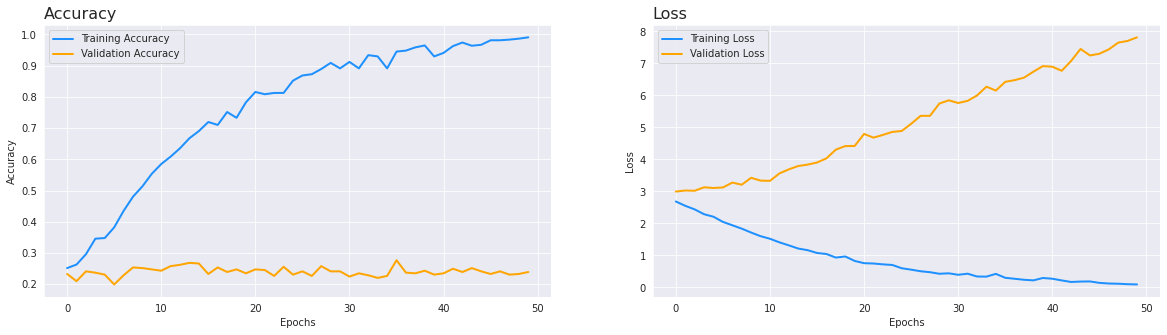

In [56]:
# plot history
plot_history(history)

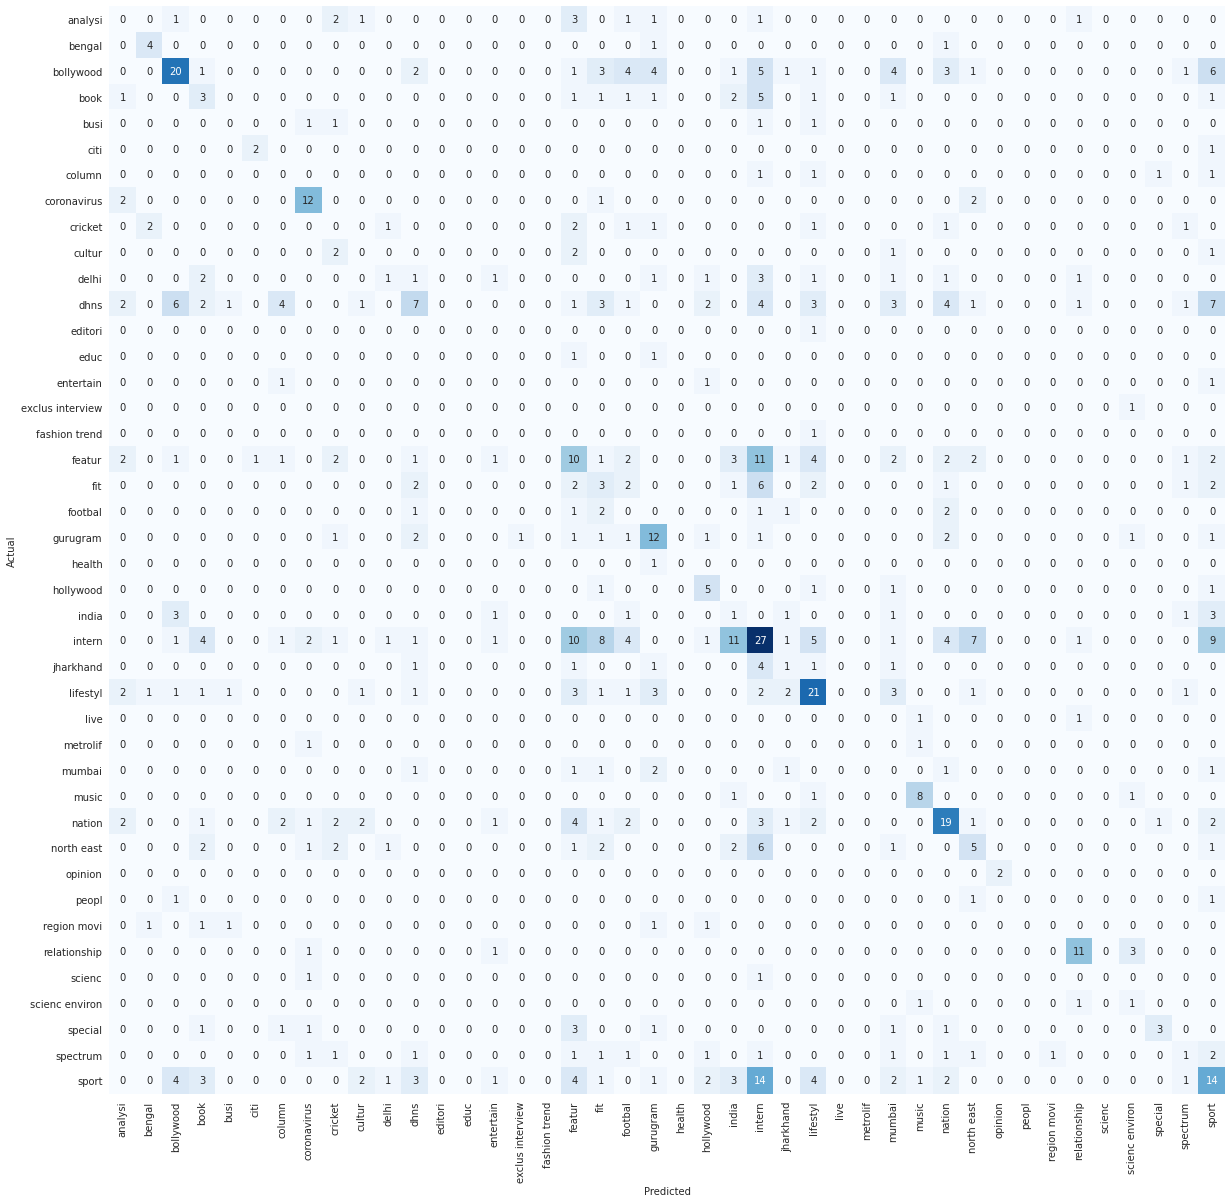

In [57]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 20)

In [61]:
# reviews on which we need to predict
sentence = ["Rojer federer is into the wimbledon finals", 
            "Rojer federer is into the wimbledon finals"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):
    print(enc.classes_[i])

[[3.2864741e-16 9.4756224e-11 4.1942223e-16 2.5243137e-21 1.7747536e-12
  2.5606751e-05 1.5718595e-15 1.8014820e-08 4.4114384e-13 9.4179275e-11
  3.7262960e-11 2.0810876e-05 3.4866377e-11 6.3551435e-11 2.4478310e-16
  3.0998037e-18 1.5290573e-17 4.7049396e-11 3.2545126e-15 1.9136355e-10
  8.4907691e-18 7.2182613e-19 2.3595525e-21 4.0428918e-06 3.8636710e-08
  2.4809562e-11 6.7193403e-14 5.6867453e-27 8.4559766e-21 4.1041720e-05
  1.4850724e-20 9.9972934e-01 9.7554180e-11 5.5352420e-09 7.7874402e-06
  7.1155214e-19 3.5577575e-16 1.0258761e-23 1.4609887e-13 4.5633302e-20
  3.2530429e-18 4.5499715e-07 1.7067154e-04 6.2886528e-12 9.7894342e-15
  4.9372768e-14 1.0084191e-17 3.5218859e-20 3.6136221e-14 2.8820583e-18
  1.6273090e-14 9.5426714e-08]
 [3.2864741e-16 9.4756224e-11 4.1942223e-16 2.5243137e-21 1.7747536e-12
  2.5606751e-05 1.5718595e-15 1.8014820e-08 4.4114384e-13 9.4179275e-11
  3.7262960e-11 2.0810876e-05 3.4866377e-11 6.3551435e-11 2.4478310e-16
  3.0998037e-18 1.5290573e-17 4.7

With Convolution

In [63]:

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_11 (Dense)             (None, 52)                1300      
Total params: 30,764
Trainable params: 30,764
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# fit model
num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/50
31/31 - 1s - loss: 2.8191 - accuracy: 0.1998 - val_loss: 2.9831 - val_accuracy: 0.1908
Epoch 2/50
31/31 - 0s - loss: 2.7139 - accuracy: 0.2391 - val_loss: 2.9289 - val_accuracy: 0.2117
Epoch 3/50
31/31 - 0s - loss: 2.5854 - accuracy: 0.3075 - val_loss: 2.8610 - val_accuracy: 0.2495
Epoch 4/50
31/31 - 0s - loss: 2.4455 - accuracy: 0.3437 - val_loss: 2.7964 - val_accuracy: 0.2767
Epoch 5/50
31/31 - 0s - loss: 2.2980 - accuracy: 0.4151 - val_loss: 2.7145 - val_accuracy: 0.3040
Epoch 6/50
31/31 - 0s - loss: 2.1547 - accuracy: 0.4617 - val_loss: 2.6689 - val_accuracy: 0.3145
Epoch 7/50
31/31 - 0s - loss: 2.0175 - accuracy: 0.5083 - val_loss: 2.6194 - val_accuracy: 0.3270
Epoch 8/50
31/31 - 0s - loss: 1.8633 - accuracy: 0.5466 - val_loss: 2.6163 - val_accuracy: 0.3333
Epoch 9/50
31/31 - 0s - loss: 1.7328 - accuracy: 0.5735 - val_loss: 2.5556 - val_accuracy: 0.3459
Epoch 10/50
31/31 - 0s - loss: 1.5941 - accuracy: 0.6232 - val_loss: 2.5208 - val_accuracy: 0.3816
Epoch 11/50
31/31 -

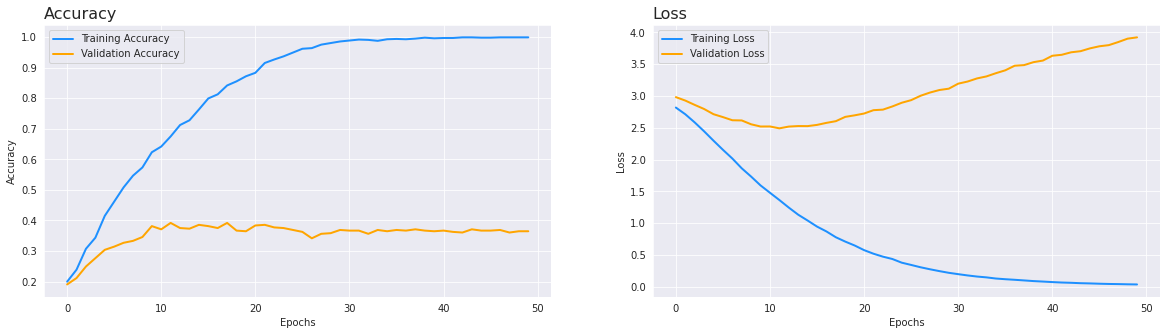

In [66]:
# plot history
plot_history(history)

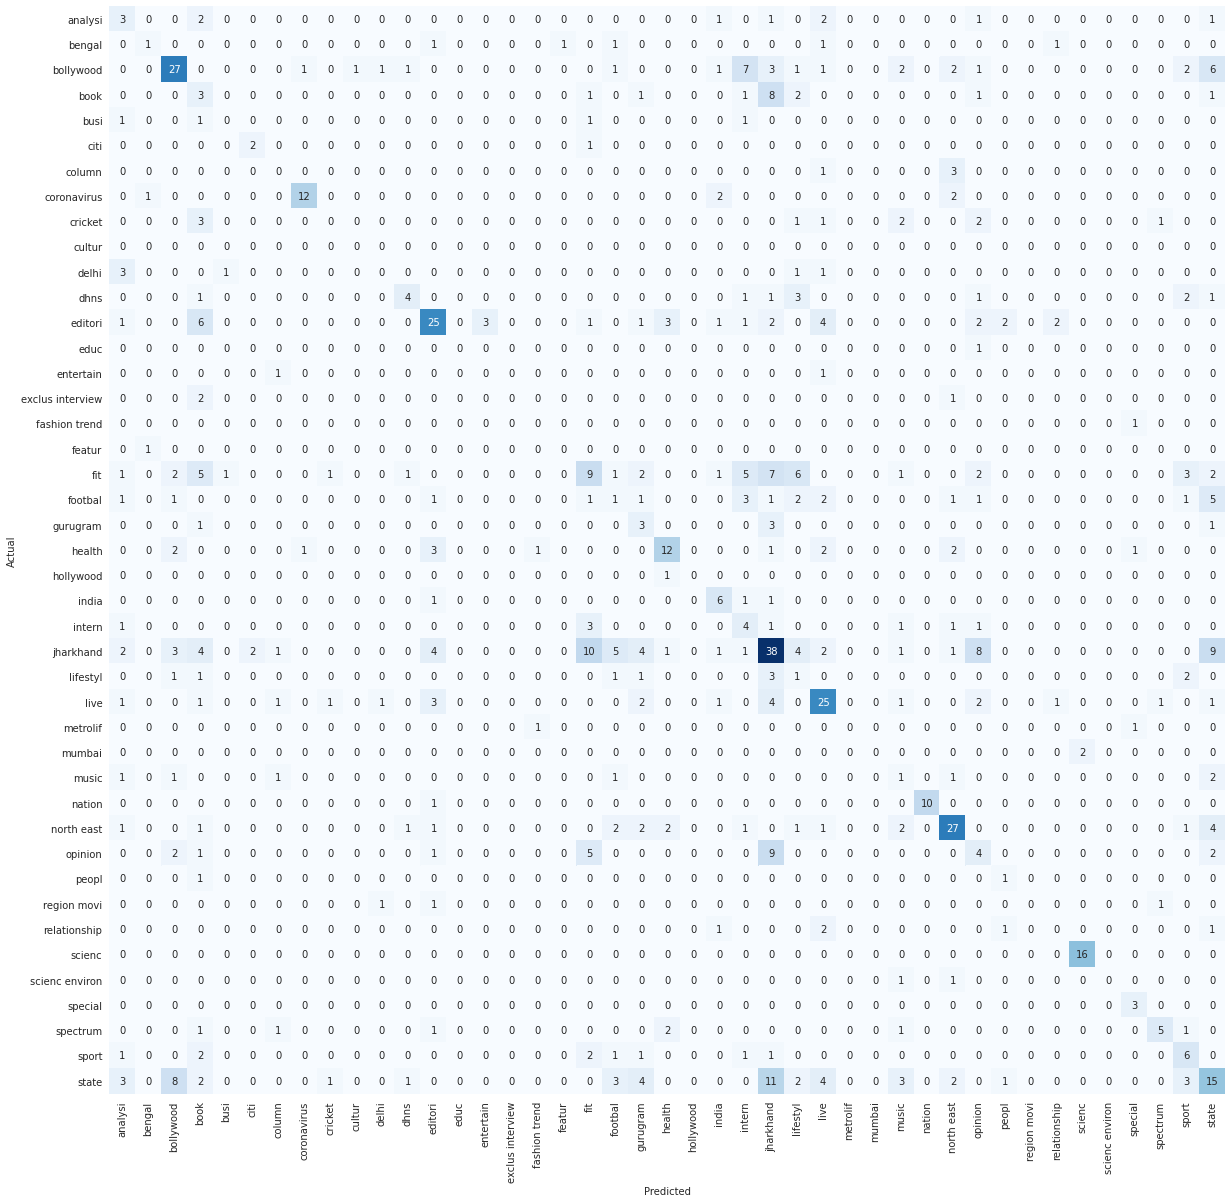

In [67]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 20)

In [68]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))


# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):
    print(enc.classes_[i])

[[1.76110654e-04 1.90860252e-08 3.66932538e-04 6.04124750e-07
  9.02998363e-06 2.79190158e-03 3.03472490e-07 1.85997669e-06
  5.69360509e-07 9.55358018e-07 9.82018467e-09 1.10304070e-04
  1.26092885e-07 1.40671887e-07 1.39603605e-02 1.27373709e-10
  2.16783230e-10 1.37350668e-04 1.20794246e-08 3.82657017e-10
  9.68881597e-09 9.86923538e-08 1.32828325e-04 5.04358148e-04
  6.25167012e-01 1.43338984e-04 4.59461808e-06 1.99529524e-07
  2.12706305e-04 3.09283001e-04 4.15528993e-05 2.98556119e-01
  4.57844289e-04 6.54429932e-09 7.73757420e-05 4.63370640e-08
  1.18217935e-12 2.29359176e-09 7.77967507e-05 4.01869897e-08
  3.31472960e-10 8.94114578e-08 1.12735911e-03 8.84527108e-05
  2.00195283e-09 7.95541553e-08 1.85180302e-10 6.83628779e-11
  2.42040166e-08 4.93183552e-06 5.55185936e-02 1.87297883e-05]
 [3.91931011e-04 1.99702822e-06 3.92709812e-03 9.09742903e-06
  4.50815861e-07 2.37915497e-02 5.79853304e-06 5.59148357e-05
  8.51426557e-06 4.18992495e-05 8.80081288e-08 1.67949969e-04
  3.608

In [69]:
# reviews on which we need to predict
sentence = ["Rojer federer is into the wimbledon finals", 
            "NASA to launch two more satellites this year"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))


# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):
    print(enc.classes_[i])

[[4.0025532e-04 1.0670756e-07 8.1903086e-04 7.6098236e-06 2.2679662e-05
  1.1739239e-02 1.1244590e-06 9.4793249e-06 2.8547618e-06 5.2245018e-06
  6.7825390e-08 1.6222875e-04 1.6212960e-06 6.2171262e-06 3.8255204e-02
  2.9235265e-09 6.5093153e-09 2.4303712e-04 2.6514454e-07 5.7332419e-09
  2.7833744e-07 1.4928276e-06 8.3998864e-04 9.5929131e-03 1.8519078e-01
  6.6018489e-04 2.8976347e-05 1.1026316e-05 2.6200202e-04 7.8781624e-04
  6.5359578e-05 1.6319807e-01 6.6122419e-04 5.0528971e-08 6.7549721e-05
  2.5545845e-07 4.2131350e-11 1.2911536e-08 3.3195119e-04 6.8767712e-08
  4.8609525e-09 1.5685416e-07 8.9251650e-03 1.1054740e-04 3.8758756e-08
  2.7007661e-07 3.6121741e-09 8.4007629e-10 6.8115821e-07 1.4137245e-04
  5.7743973e-01 5.7674156e-06]
 [4.0008305e-04 1.6101195e-07 3.3832749e-03 2.5189702e-06 8.4758867e-06
  3.0396055e-02 5.9504788e-07 8.9738869e-06 1.9160921e-06 7.5726271e-06
  3.0706818e-08 1.1573160e-03 1.4470832e-06 8.9548695e-07 3.0729133e-01
  2.9237999e-09 3.2543210e-09 4.1

In [ ]:
#evaluate accuracy
def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)
print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))
print("model LSTM with Attention:       %.6f" % evaluate_accuracy(AttentionLSTM))

In [ ]:
#Ensemble
def evaluate_accuracy_ensemble(models):
    res = np.zeros(shape=y_val.shape)
    for model in models:
        predicted = model.predict(x_val)
        res += predicted
    res /= len(models)
    diff = y_val.argmax(axis=-1) - res.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)
print(evaluate_accuracy_ensemble([TextCNN, BiGRU, AttentionLSTM]))